In [16]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Set paths to your dataset directories
train_dir = '/Users/friday/Downloads/brain_mri_scan_images'
test_dir = '/Users/friday/Downloads/brain_mri_scan_images'

# Set image size and batch size
img_height, img_width = 160, 160
batch_size = 32

# Setup Image Data Generators with Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for correct label ordering in confusion matrix
)

Found 227 images belonging to 2 classes.
Found 227 images belonging to 2 classes.


In [17]:
img_shape=(160,160,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(2, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [19]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20


/Users/friday/deletethis/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.5363 - loss: 1.2618 - precision_2: 0.5363 - recall_2: 0.5363 - val_accuracy: 0.5683 - val_loss: 2.2864 - val_precision_2: 0.5683 - val_recall_2: 0.5683
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6281 - loss: 0.5973 - precision_2: 0.6281 - recall_2: 0.6281 - val_accuracy: 0.5903 - val_loss: 1.0016 - val_precision_2: 0.5903 - val_recall_2: 0.5903
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6721 - loss: 0.5568 - precision_2: 0.6721 - recall_2: 0.6721 - val_accuracy: 0.6079 - val_loss: 0.6041 - val_precision_2: 0.6079 - val_recall_2: 0.6079
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8064 - loss: 0.4644 - precision_2: 0.8064 - recall_2: 0.8064 - val_accuracy: 0.6696 - val_loss: 0.5350 - val_precision_2: 0.6696 - val_recall_2: 0.6696
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7935 - loss: 0.4804 - precision_2: 0.7935 - recall_2: 0.7935 - val_accuracy: 0.7974 - val_lo

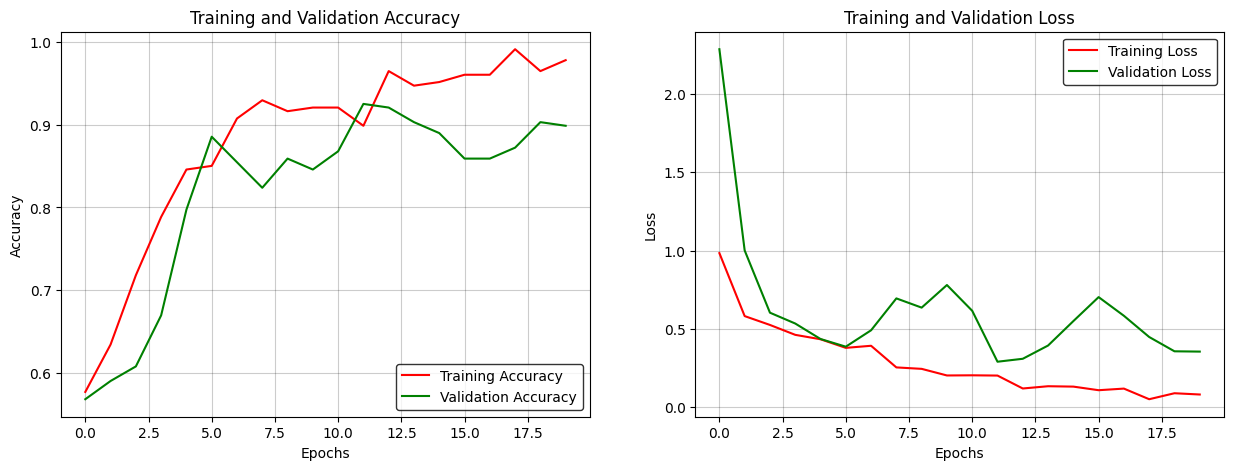

8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step 
Confusion Matrix
[[ 76  22]
 [  1 128]]
Classification Report
              precision    recall  f1-score   support

    negative       0.99      0.78      0.87        98
    positive       0.85      0.99      0.92       129

    accuracy                           0.90       227
   macro avg       0.92      0.88      0.89       227
weighted avg       0.91      0.90      0.90       227



In [20]:
# Evaluate the model and plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Create a figure with a white background
fig, axs = plt.subplots(1, 2, figsize=(15, 5), facecolor='white')

# Set the background color of each subplot to white
for ax in axs:
    ax.set_facecolor('white')

# Plot Training and Validation Accuracy
axs[0].plot(epochs_range, acc, label='Training Accuracy', color='red')
axs[0].plot(epochs_range, val_acc, label='Validation Accuracy', color='green')
legend = axs[0].legend(loc='lower right', facecolor='white', edgecolor='black')
plt.setp(legend.get_texts(), color='black')  # Set legend text color to black
axs[0].set_title('Training and Validation Accuracy', color='black')
axs[0].set_xlabel('Epochs', color='black')
axs[0].set_ylabel('Accuracy', color='black')
axs[0].tick_params(axis='x', colors='black')
axs[0].tick_params(axis='y', colors='black')
axs[0].spines['top'].set_color('black')
axs[0].spines['bottom'].set_color('black')
axs[0].spines['left'].set_color('black')
axs[0].spines['right'].set_color('black')
axs[0].grid(True, color='black', alpha=0.2)

# Plot Training and Validation Loss
axs[1].plot(epochs_range, loss, label='Training Loss', color='red')
axs[1].plot(epochs_range, val_loss, label='Validation Loss', color='green')
legend = axs[1].legend(loc='upper right', facecolor='white', edgecolor='black')
plt.setp(legend.get_texts(), color='black')  # Set legend text color to black
axs[1].set_title('Training and Validation Loss', color='black')
axs[1].set_xlabel('Epochs', color='black')
axs[1].set_ylabel('Loss', color='black')
axs[1].tick_params(axis='x', colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].spines['top'].set_color('black')
axs[1].spines['bottom'].set_color('black')
axs[1].spines['left'].set_color('black')
axs[1].spines['right'].set_color('black')
axs[1].grid(True, color='black', alpha=0.2)

plt.show()

# Confusion Matrix and Classification Report
Y_pred = model.predict(validation_generator, len(validation_generator.classes))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

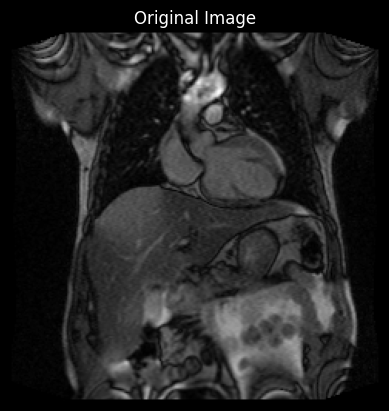

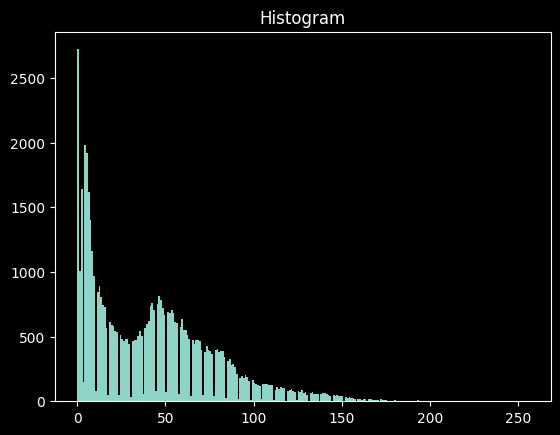

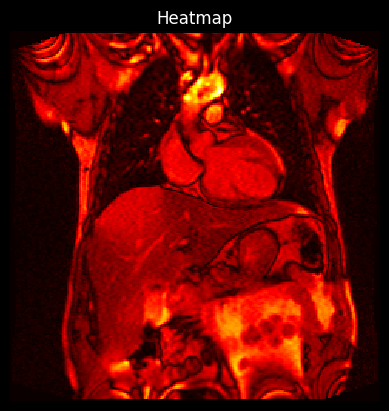

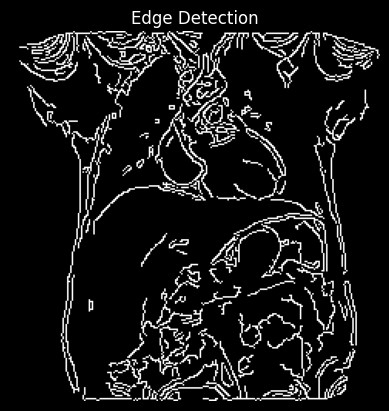

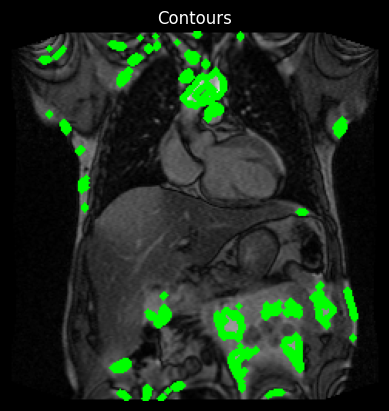

Loading image Bengin case (85).jpg from folder /Users/friday/Downloads/images/archive 2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases
Loading image Bengin case (109).jpg from folder /Users/friday/Downloads/images/archive 2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases
Loading image Bengin case (93).jpg from folder /Users/friday/Downloads/images/archive 2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases
Loading image Bengin case (50).jpg from folder /Users/friday/Downloads/images/archive 2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases
Loading image Bengin case (11).jpg from folder /Users/friday/Downloads/images/archive 2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases
Loading image Bengin case (46).jpg from folder /Users/friday/Downloads/images/archive 2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung c

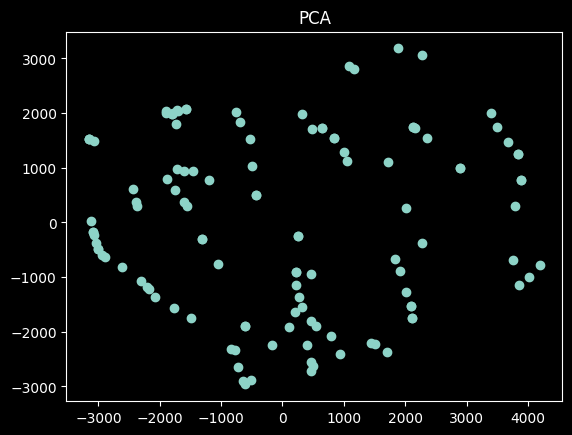

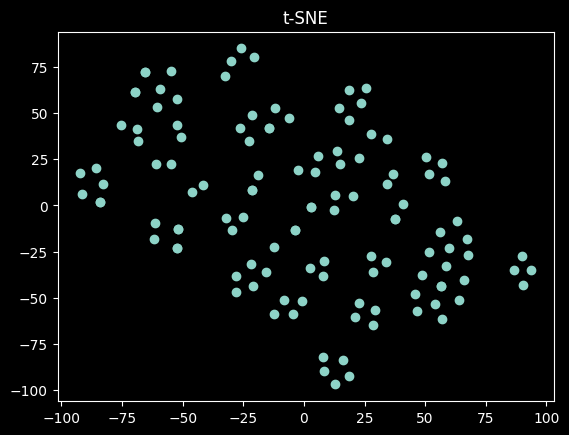

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: [('n06596364', 'comic_book', 0.22258328)]


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import os
import tensorflow as tf
from tensorflow.keras import backend as K

def display_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

def plot_histogram(image_path):
    img = cv2.imread(image_path, 0)
    plt.hist(img.ravel(), bins=256, range=[0,256])
    plt.title('Histogram')
    plt.show()

def plot_heatmap(image_path):
    img = cv2.imread(image_path, 0)
    plt.imshow(img, cmap='hot', interpolation='nearest')
    plt.title('Heatmap')
    plt.axis('off')
    plt.show()

def plot_edges(image_path):
    img = cv2.imread(image_path, 0)
    edges = cv2.Canny(img, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')
    plt.show()

def plot_contours(image_path):
    img = cv2.imread(image_path, 0)
    ret, thresh = cv2.threshold(img, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title('Contours')
    plt.axis('off')
    plt.show()

def load_images_from_folder(folder, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        print('Loading image', filename, 'from folder', folder)
        img = cv2.imread(os.path.join(folder, filename), 0)
        if img is not None:
            # Resize image to the target size
            img_resized = cv2.resize(img, target_size)
            images.append(img_resized.flatten())
    return np.array(images)

def plot_pca(images):
    pca = PCA(n_components=2)
    img_pca = pca.fit_transform(images)
    plt.scatter(img_pca[:, 0], img_pca[:, 1])
    plt.title('PCA')
    plt.show()

def plot_tsne(images):
    tsne = TSNE(n_components=2)
    img_tsne = tsne.fit_transform(images)
    plt.scatter(img_tsne[:, 0], img_tsne[:, 1])
    plt.title('t-SNE')
    plt.show()

def plot_grad_cam(image_path):
    model = VGG16(weights='imagenet')
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds, top=1)[0])
    class_idx = np.argmax(preds[0])
    class_output = tf.gather(model.output, class_idx, axis=1)
    last_conv_layer = model.get_layer('block5_conv3')

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    plt.matshow(heatmap)
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

def main(image_folder, sample_image_path):
    display_image(sample_image_path)
    plot_histogram(sample_image_path)
    plot_heatmap(sample_image_path)
    plot_edges(sample_image_path)
    plot_contours(sample_image_path)
    
    images = load_images_from_folder(image_folder)
    plot_pca(images)
    plot_tsne(images)
    plot_grad_cam(sample_image_path)

if __name__ == "__main__":
    image_folder = '/Users/friday/Downloads/images/archive 2/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases'  # Replace with your folder path
    sample_image_path = '/Users/friday/Downloads/images/IM00001.jpg'  # Replace with your image path
    main(image_folder, sample_image_path)


In [ ]:
# Load and preprocess a sample image
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import random

# Load an image
image_path = '/Users/friday/Downloads/images/heart.jpg'  # Replace with your image path
image = Image.open(image_path)

# Define additional data augmentation functions
def rotate_image(image, angle):
    return image.rotate(angle)

def flip_image(image):
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def shift_image(image, shift):
    return image.transform(image.size, Image.AFFINE, data=shift, resample=Image.BILINEAR)

def zoom_image(image, zoom_factor):
    w, h = image.size
    x = w//zoom_factor
    y = h//zoom_factor
    return image.crop((x, y, w-x, h-y)).resize((w, h), Image.LANCZOS)

def change_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def change_contrast(image, factor):
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(factor)

# Modify the add_noise function to handle both grayscale and RGB images
def add_noise(image):
    image_array = np.array(image)
    if len(image_array.shape) == 2:  # Grayscale image
        noise = np.random.randint(0, 50, image_array.shape, dtype='uint8')
    else:  # RGB image
        noise = np.random.randint(0, 50, (image_array.shape[0], image_array.shape[1], 3), dtype='uint8')
    
    noisy_image = image_array + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return Image.fromarray(noisy_image.astype('uint8'))

def blur_image(image):
    return image.filter(ImageFilter.GaussianBlur(radius=2))

# Apply data augmentation to the image
augmented_images = []
augmentation_names = []

# Rotate the image
augmented_images.append(rotate_image(image, 30))  # Rotate by 30 degrees
augmentation_names.append("Rotation (30 degrees)")

# Flip the image horizontally
augmented_images.append(flip_image(image))
augmentation_names.append("Horizontal Flip")

# Shift the image
shift_matrix = [1, 0, 50, 0, 1, 30]  # Horizontal shift of 50 pixels, vertical shift of 30 pixels
augmented_images.append(shift_image(image, shift_matrix))
augmentation_names.append("Shift (50px, 30px)")

# Zoom the image
augmented_images.append(zoom_image(image, 4))  # Zoom in by a factor of 4
augmentation_names.append("Zoom (4x)")

# Change brightness
augmented_images.append(change_brightness(image, 1.5))  # Increase brightness by 50%
augmentation_names.append("Brightness (+50%)")

# Change contrast
augmented_images.append(change_contrast(image, 0.5))  # Decrease contrast by 50%
augmentation_names.append("Contrast (-50%)")

# Add noise to the image
augmented_images.append(add_noise(image))
augmentation_names.append("Add Noise")

# Blur the image
augmented_images.append(blur_image(image))
augmentation_names.append("Gaussian Blur")

# Display the original and augmented images
plt.figure(figsize=(20, 15))

for i, (augmented_image, name) in enumerate(zip(augmented_images, augmentation_names)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(augmented_image))
    plt.title(name)
    plt.axis('off')

# Display the original image
plt.subplot(3, 3, len(augmented_images) + 1)
plt.imshow(np.array(image))
plt.title('Original Image')
plt.axis('off')

plt.show()